#   Predective Modeling

## Step 1: Prepare Data for Coral Cover Time Series

**Purpose:**
Prepare the coral cover data for time series analysis by aggregating it and selecting a site.

**Input:**
* `processed_stony_coral.csv` (from "temp/")

**Output:**
* A Pandas DataFrame containing the total coral cover for a selected site over time.

**Analysis Steps:**
1.  Load the `processed_stony_coral.csv` file.
2.  Identify the columns representing coral species.
3.  Calculate the total coral cover for each sample by summing the cover values across all species columns.
4.  Group the data by 'year' and 'SiteName' and calculate the mean total coral cover.
5.  Select a specific 'SiteName' for time series analysis.
6.  Extract the time series of total coral cover for the selected site.
7.  Display the first few rows of the prepared data and its data types.

In [1]:
import pandas as pd
import os

#   1. Load the data
data_dir = "C:\\Users\\vijai\\Desktop\Florida"  #   Update if needed
coral_df = pd.read_csv(os.path.join(data_dir, "processed_stony_coral.csv"))

#   2. Identify coral species columns
species_columns = [
    col for col in coral_df.columns
    if pd.api.types.is_numeric_dtype(coral_df[col]) and col not in ['OID_', 'year', 'SiteID', 'StationID', 'points']
]

#   3. Calculate total coral cover
coral_df['Total_Coral_Cover'] = coral_df[species_columns].sum(axis=1)

#   4. Group by year and SiteName
site_annual_cover = coral_df.groupby(['year', 'SiteName'])['Total_Coral_Cover'].mean().reset_index()

#   5. Select a site for analysis
selected_site = 'Admiral'  #   Choose a site (e.g., 'Admiral', 'Rattlesnake')
site_cover_ts = site_annual_cover[site_annual_cover['SiteName'] == selected_site]

#   6. Extract the time series
site_cover_ts = site_cover_ts[['year', 'Total_Coral_Cover']].set_index('year')

#   7. Display the prepared data
print(site_cover_ts.head())
print(site_cover_ts.info())

      Total_Coral_Cover
year                   
1996           0.327025
1997           0.312350
1998           0.302650
1999           0.249825
2000           0.214000
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1996 to 2023
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Total_Coral_Cover  28 non-null     float64
dtypes: float64(1)
memory usage: 448.0 bytes
None


## Step 2: Fit ARIMA Model and Make Predictions

**Purpose:**
Fit an ARIMA model to the coral cover time series and make predictions for future years.

**Input:**
* Pandas DataFrame `site_cover_ts` (from Step 1)

**Output:**
* ARIMA model results.
* Predictions of total coral cover for future years.
* Visualization of the historical data and predictions.

**Analysis Steps:**
1.  Import the necessary libraries (`statsmodels.tsa.arima.model`, `matplotlib.pyplot`).
2.  Fit an ARIMA model to the `site_cover_ts` data.
    * Determine the ARIMA order (p, d, q) using either manual selection or automated methods (e.g., auto_arima). For simplicity, we'll start with a basic order here.
3.  Make predictions for the desired number of future years.
4.  Plot the historical data and the predictions, including confidence intervals.
5.  Print the ARIMA model summary.

C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

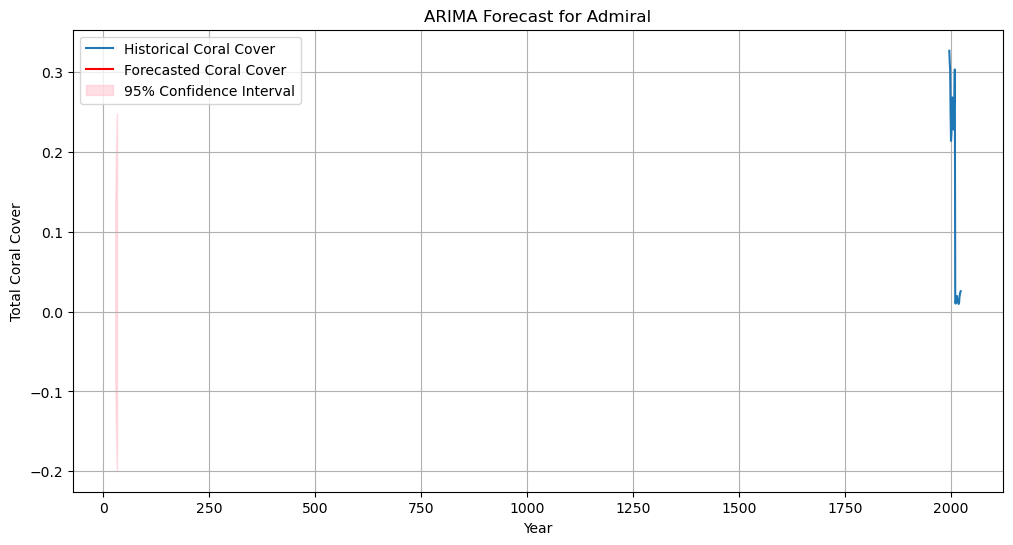

                               SARIMAX Results                                
Dep. Variable:      Total_Coral_Cover   No. Observations:                   28
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  38.127
Date:                Sun, 20 Apr 2025   AIC                            -70.254
Time:                        20:59:00   BIC                            -66.366
Sample:                             0   HQIC                           -69.098
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4664      5.067      0.092      0.927      -9.465      10.398
ma.L1         -0.5809      5.090     -0.114      0.909     -10.557       9.395
sigma2         0.0035      0.001      5.445      0.0

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#   1. Import libraries

#   2. Fit ARIMA model
#   --- You'll likely need to determine the best ARIMA order (p, d, q) ---
#   --- using methods like auto_arima or by analyzing ACF and PACF plots. ---
#   --- For this example, let's start with a simple order (1, 1, 1).     ---
order = (1, 1, 1)  #   (p, d, q)
model = ARIMA(site_cover_ts, order=order)
model_fit = model.fit()

#   3. Make predictions
forecast_years = 5  #   Number of years to forecast
forecast_result = model_fit.get_forecast(steps=forecast_years)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)  #   95% confidence intervals

#   Create a DataFrame for the forecast
forecast_index = pd.RangeIndex(start=site_cover_ts.index[-1] + 1, stop=site_cover_ts.index[-1] + 1 + forecast_years, step=1)
forecast_df = pd.DataFrame({'Total_Coral_Cover': forecast}, index=forecast_index)

#   4. Plot results
plt.figure(figsize=(12, 6))
plt.plot(site_cover_ts, label='Historical Coral Cover')
plt.plot(forecast_df, label='Forecasted Coral Cover', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Total Coral Cover')
plt.title(f'ARIMA Forecast for {selected_site}')
plt.legend()
plt.grid(True)
plt.show()

#   5. Print model summary
print(model_fit.summary())